In [21]:
%load_ext autoreload
%autoreload 2

from lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
train_data = torchvision.datasets.MNIST(root='./data',
                   train=True,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root='./data',
                   train=False,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

train_X, train_Y = train_data.data.numpy(), train_data.targets.numpy()
test_X, test_Y = test_data.data.numpy(), test_data.targets.numpy()

#reduced size dataset can be used for quick testing of computationally intesive steps
train_X_sm, train_Y_sm = train_X[:1000,:], train_Y[:1000]

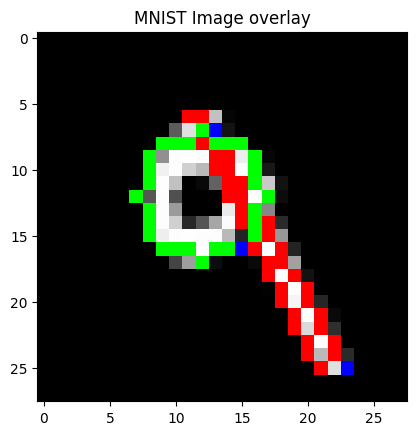

In [72]:
for i in range(7, 8):
    show_overlay(test_X[i], get_lines(test_X[i]), get_circles(test_X[i]), get_corners(test_X[i]))

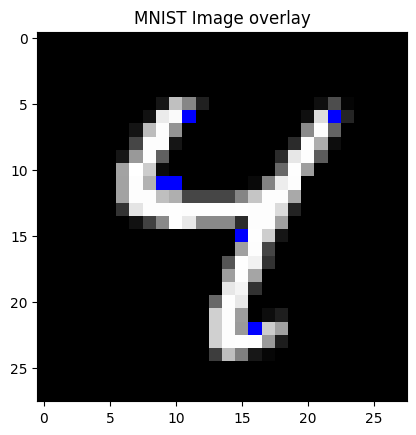

In [24]:
for i in range(6, 7):
    show_overlay(test_X[i], np.full(test_X[i].shape, np.nan), np.full(test_X[i].shape, np.nan), get_corners(test_X[i]))

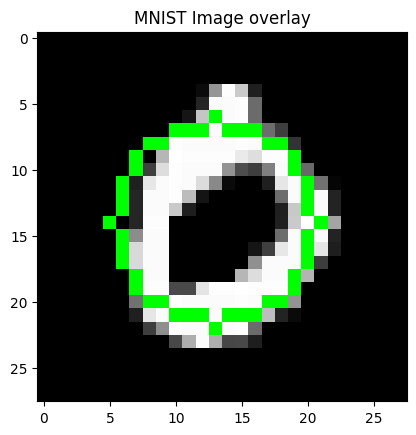

In [25]:
for i in range(3, 4):
    show_overlay(test_X[i], np.full(test_X[i].shape, np.nan), get_circles(test_X[i]), np.full(test_X[i].shape, np.nan))

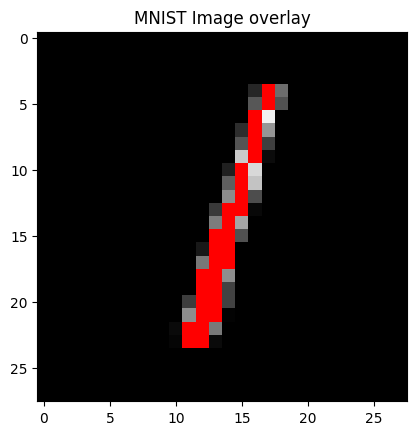

In [26]:
for i in range(2, 3):
    show_overlay(test_X[i], get_lines(test_X[i]), np.full(test_X[i].shape, np.nan), np.full(test_X[i].shape, np.nan))

In [27]:
def decision_tree(train_data, test_data, max_depth=4):
    dt_clf = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
    dt_clf.fit(train_data.reshape(60000,-1),train_Y)
    return dt_clf.score(test_data.reshape(10000,-1),test_Y)

In [28]:
def random_forest(train_data, test_data, max_depth=4):
    rf_clf = RandomForestClassifier(max_depth=max_depth)
    rf_clf.fit(train_data.reshape(60000,-1),train_Y)
    return rf_clf.score(test_data.reshape(10000,-1),test_Y)

In [29]:
print(decision_tree(train_X, test_X))
print(random_forest(train_X, test_X))

0.5957
0.8259


In [30]:
train_X_features = np.array([get_features(x) for x in train_X])
test_X_features = np.array([get_features(x) for x in test_X])

In [31]:
print(decision_tree(train_X_features, test_X_features))
print(random_forest(train_X_features, test_X_features))

0.3906
0.487


In [32]:
train_X_cd = np.array([get_corners(x) for x in train_X])
test_X_cd = np.array([get_corners(x) for x in test_X])

In [33]:
print(decision_tree(train_X_cd, test_X_cd))
print(random_forest(train_X_cd, test_X_cd))

0.3693
0.4893


In [34]:
train_X_lines = np.array([get_lines(x) for x in train_X])
test_X_lines = np.array([get_lines(x) for x in test_X])

In [35]:
print(decision_tree(train_X_lines, test_X_lines))
print(random_forest(train_X_lines, test_X_lines))

0.3486
0.41


In [36]:
train_X_circles = np.array([get_circles(x) for x in train_X])
test_X_circles = np.array([get_circles(x) for x in test_X])

In [37]:
print(decision_tree(train_X_circles, test_X_circles))
print(random_forest(train_X_circles, test_X_circles))

0.3543
0.3757


In [73]:
def graph_export(clf):
    dot_data = sklearn.tree.export_graphviz(
        clf, 
        out_file=None, 
        filled=True,
        class_names=['0','1','2','3','4','5','6','7','8','9'],
        feature_names=get_feature_names()
    )
    graph = graphviz.Source(dot_data, format="svg")
    graph.render("dt-viz-depth-4")

'dt-viz-depth-4.svg'

In [ ]:
# uncomment this code to export the svg with the decision tree
# you need to have graphviz downloaded
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
# clf = sklearn.tree.DecisionTreeClassifier(max_depth=4)
# clf.fit(train_X_features.reshape(60000,-1),train_Y)
# clf.score(test_X_features.reshape(10000,-1),test_Y)
# graph_export(clf)

## TODO:
- Get the proper class name order for decision tree visualization (order that digits appear in test data)
- Try to understand dt visualization by looking at examples, try to see if it learned anything intuitive
- Try sorting each of the features (lines,circles,corners) based on their position in the image to see if that
  improves accuracy. (You'd think always having the upper-most circle be Ci1 - for example - would be helpful)
- Test any other pre-processing that you thing might improve accuracy
- (OPTIONAL) Hyperparameter tuning
    - Train on training data, optimize parameters (like thresholds etc in the computer vision funcs)
      based on cross-validation sklearn parameter grid search
- Write the report
- Do the demo